In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

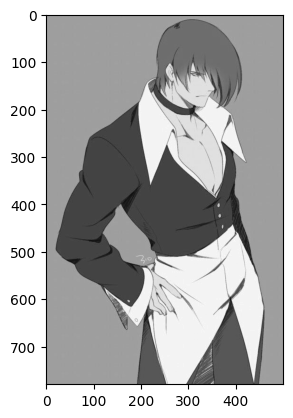

In [19]:
image = plt.imread("IoriYagami.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image,cmap="gray")

## Melakukan dekomposisi citra level 1

In [20]:
lowPass = np.array([0.7, 0.7])
highPass = np.array([-0.7, 0.7])

In [21]:
def decomposition(img):
    l = np.zeros((img.shape[0], img.shape[1]//2), dtype=float)
    h = np.zeros((img.shape[0], img.shape[1]//2), dtype=float)
    ll = np.zeros((l.shape[0]//2, l.shape[1]), dtype=float)
    lh = np.zeros((l.shape[0]//2, l.shape[1]), dtype=float)
    hl = np.zeros((l.shape[0]//2, l.shape[1]), dtype=float)
    hh = np.zeros((l.shape[0]//2, l.shape[1]), dtype=float)

    for i in range(0,img.shape[0],1):
        for j in range(0,img.shape[1],2):
            l[i,j//2] = (img[i,j]*lowPass[0]+img[i,j+1]*lowPass[1])/2
            h[i,j//2] = (img[i,j]*highPass[0]+img[i,j+1]*highPass[1])/2
    
    for i in range(0,l.shape[0],2):
        for j in range(0,l.shape[1],1):
            ll[i//2,j] = (l[i,j]*lowPass[0]+l[i+1,j]*lowPass[1])/2
            lh[i//2,j] = (l[i,j]*highPass[0]+l[i+1,j]*highPass[1])/2
            hl[i//2,j] = (h[i,j]*lowPass[0]+h[i+1,j]*lowPass[1])/2
            hh[i//2,j] = (h[i,j]*highPass[0]+h[i+1,j]*highPass[1])/2
    
    return ll, lh, hl, hh

Text(0.5, 1.0, 'Diagonal Details')

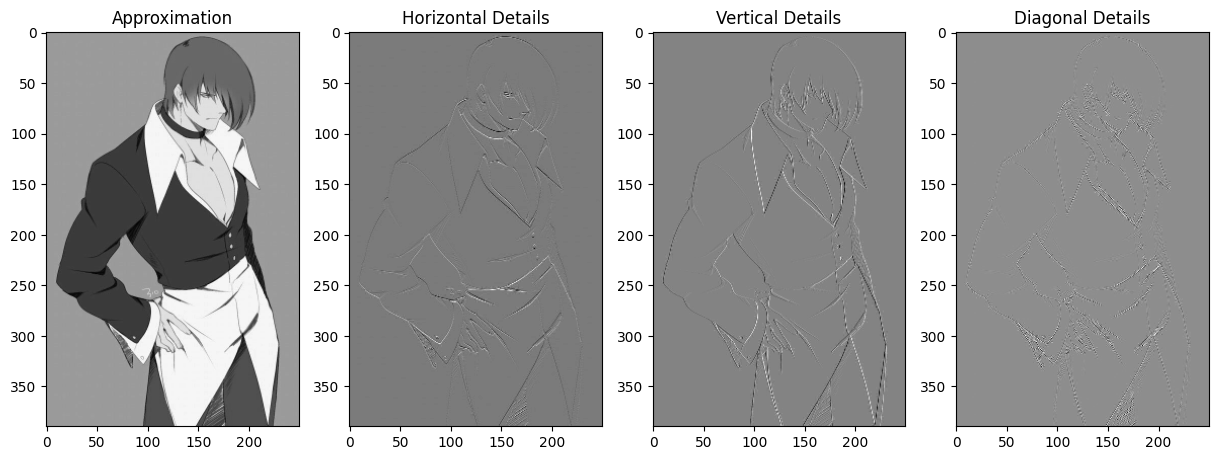

In [22]:
ll2, lh2, hl2, hh2 = decomposition(image)
plt.figure (figsize=(15,10))

plt.subplot(1,4,1)
plt.imshow(ll2, cmap='gray')
plt.title('Approximation')
plt.subplot(1,4,2)
plt.imshow(lh2, cmap='gray')
plt.title('Horizontal Details')
plt.subplot(1,4,3)
plt.imshow(hl2, cmap='gray')
plt.title('Vertical Details')
plt.subplot(1,4,4)
plt.imshow(hh2, cmap='gray')
plt.title('Diagonal Details')

In [23]:
def gabung_ll_lh_hl_hh(ll, lh, hl, hh):
    tinggi, lebar = ll.shape[:2]

    # Buat citra gabungan dengan ukuran yang sesuai
    gabungan = np.zeros((tinggi * 2, lebar * 2), dtype=np.float32)

    # Masukkan segmen-segmen citra ke dalam citra gabungan
    gabungan[0:tinggi, 0:lebar] = ll
    gabungan[0:tinggi, lebar:] = lh
    gabungan[tinggi:, 0:lebar] = hl
    gabungan[tinggi:, lebar:] = hh

    return gabungan

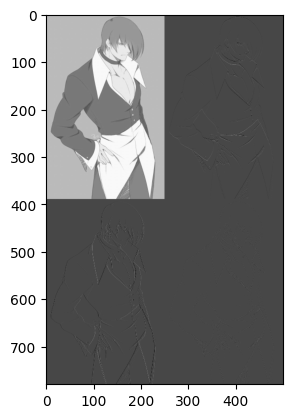

In [24]:
hasil_gabungan = gabung_ll_lh_hl_hh(ll2, lh2, hl2, hh2)

# Sekarang Anda dapat menampilkan hasil_gabungan
plt.imshow(hasil_gabungan, cmap='gray')
plt.show()

In [25]:
def reconstruction(LLgray, LHgray, HLgray, HHgray):
    l = np.zeros((LLgray.shape[0]*2,LLgray.shape[1]), dtype=float)
    h = np.zeros((LLgray.shape[0]*2,LLgray.shape[1]), dtype=float)
    result = np.zeros((LLgray.shape[0]*2,LLgray.shape[1]*2), dtype=float)

    for i in range(LLgray.shape[0]) :
        for j in range(LLgray.shape[1]) :
            l[i*2,j] = LLgray[i,j]/lowPass[0] + LHgray[i,j]/highPass[0]
            l[i*2+1,j] = LLgray[i,j]/lowPass[1] + LHgray[i,j]/highPass[1]

            h[i*2,j] = HLgray[i,j]/lowPass[0] + HHgray[i,j]/highPass[0]
            h[i*2+1,j] = HLgray[i,j]/lowPass[1] + HHgray[i,j]/highPass[1]
    
    for i in range(l.shape[0]) :
        for j in range(l.shape[1]) :
            result[i,j*2] = l[i,j]/lowPass[0] + h[i,j]/highPass[0]
            result[i,j*2+1] = l[i,j]/lowPass[1] + h[i,j]/highPass[1]
    
    return result

(Text(0.5, 1.0, 'Rekonstruksi Wavelete'),
 <matplotlib.image.AxesImage at 0x142634c3080>)

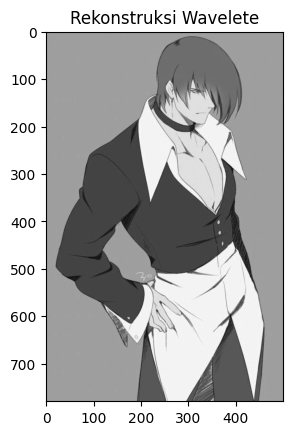

In [26]:
rekons = reconstruction(ll2, lh2, hl2, hh2)
plt.title('Rekonstruksi Wavelete'), plt.imshow(rekons, cmap='gray')